In [5]:
using Pkg
Pkg.activate(".")

using Flux: loadmodel!, Chain, Dense, flatten
using JLD2

encoder = Chain(
    flatten,
    Dense(28*28 => 256), 
    x -> tanh.(x),
    Dense(256 => 8), 
    x -> tanh.(x),
)

decoder = Chain(
    Dense(8 => 256), 
    x -> tanh.(x),
    Dense(256 => 28*28), 
    x -> tanh.(x),
    x -> reshape(x, 28, 28, :),
)

model = Chain(
    enc = encoder,
    dec = decoder
)

  Activating project at `~/julia-ml`


Chain(
  enc = Chain(
    Flux.flatten,
    Dense(784 => 256),                  # 200_960 parameters
    var"#25#27"(),
    Dense(256 => 8),                    # 2_056 parameters
    var"#26#28"(),
  ),
  dec = Chain(
    Dense(8 => 256),                    # 2_304 parameters
    var"#29#32"(),
    Dense(256 => 784),                  # 201_488 parameters
    var"#30#33"(),
    var"#31#34"(),
  ),
)                   # Total: 8 arrays, 406_808 parameters, 1.552 MiB.

In [6]:
model_state = JLD2.load("models/autoencoder_2023-09-17T12:09:19.996.jld2", "model_state")
loadmodel!(model, model_state)

Chain(
  enc = Chain(
    Flux.flatten,
    Dense(784 => 256),                  # 200_960 parameters
    var"#25#27"(),
    Dense(256 => 8),                    # 2_056 parameters
    var"#26#28"(),
  ),
  dec = Chain(
    Dense(8 => 256),                    # 2_304 parameters
    var"#29#32"(),
    Dense(256 => 784),                  # 201_488 parameters
    var"#30#33"(),
    var"#31#34"(),
  ),
)                   # Total: 8 arrays, 406_808 parameters, 1.552 MiB.

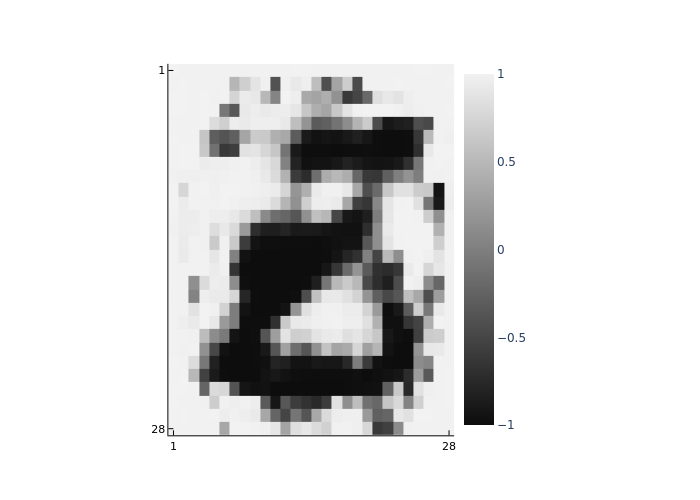

In [30]:
using MIRTjim: jim

jim(model[:dec](randn(Float32, 8)))